In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree

In [ ]:
heart = pd.read_excel("/content/heart_disea.xlsx",sheet_name="Heart_disease")

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
heart['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [ ]:
label_encoder = preprocessing.LabelEncoder()
heart['Heart_Label']= label_encoder.fit_transform(heart['num'])

In [ ]:
heart.rename({'num':'Disease_Levels'},axis=True,inplace=True)

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,Disease_Levels,Heart_Label
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4,4


In [ ]:
heart['Heart_Label'].value_counts()

,count
Heart_Label,
0,399
1,265
2,109
3,107
4,28


In [ ]:
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
heart.drop('oldpeak',axis=1,inplace=True)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             908 non-null    int64 
 1   sex             908 non-null    object
 2   cp              908 non-null    object
 3   trestbps        908 non-null    int64 
 4   chol            908 non-null    int64 
 5   fbs             908 non-null    bool  
 6   restecg         908 non-null    object
 7   thalch          908 non-null    int64 
 8   exang           908 non-null    object
 9   slope           908 non-null    object
 10  thal            908 non-null    object
 11  Disease_Levels  908 non-null    int64 
 12  Heart_Label     908 non-null    int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 86.1+ KB


In [ ]:
df = pd.get_dummies(heart,columns = ['sex','cp','restecg','slope','thal'])

In [ ]:
df.drop(['age'	,'trestbps','chol',	'fbs',	'thalch','exang'],axis=1,inplace=True)

In [ ]:
df

,Disease_Levels,Heart_Label,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0,0,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False
1,0,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
2,0,0,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False
3,0,0,False,True,False,False,False,True,True,False,False,False,True,False,True,False,False
4,0,0,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,4,4,False,True,True,False,False,False,False,True,False,False,False,True,True,False,False
904,4,4,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False
905,4,4,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False
906,4,4,False,True,False,False,True,False,False,False,True,True,False,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split
X = df.drop(['Disease_Levels','Heart_Label'], axis=1)
y = df['Heart_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5604395604395604
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        89
           1       0.39      0.54      0.45        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.21      0.28      0.24       182
weighted avg       0.43      0.56      0.49       182



In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5, 0.9, 'x[2] <= 0.5\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.25, 0.7, 'x[0] <= 0.5\ngini = 0.468\nsamples = 318\nvalue = [224.0, 54.0, 16.0, 20.0, 4.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[3] <= 0.5\ngini = 0.549\nsamples = 227\nvalue = [143, 47, 14, 19, 4]'),
 Text(0.0625, 0.3, 'x[8] <= 0.5\ngini = 0.641\nsamples = 149\nvalue = [79, 35, 13, 18, 4]'),
 Text(0.03125, 0.1, 'gini = 0.595\nsamples = 123\nvalue = [72, 26, 7, 14, 4]'),
 Text(0.09375, 0.1, 'gini = 0.731\nsamples = 26\nvalue = [7, 9, 6, 4, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 0.5\ngini = 0.303\nsamples = 78\nvalue = [64, 12, 1, 1, 0]'),
 Text(0.15625, 0.1, 'gini = 0.454\nsamples = 23\nvalue = [15, 8, 0, 0, 0]'),
 Text(0.21875, 0.1, 'gini = 0.2\nsamples = 55\nvalue = [49, 4, 1, 1, 0]'),
 Text(0.375, 0.5, 'x[14] <= 0.5\ngini = 0.201\nsamples = 91\nvalue = [81, 7, 2, 1, 0]'),
 Text(0.3125, 0.3, 'x[8] <= 0.5\ngini = 0.143\nsamples = 66\nvalue = [61, 3, 1, 1, 0]'),
 Tex

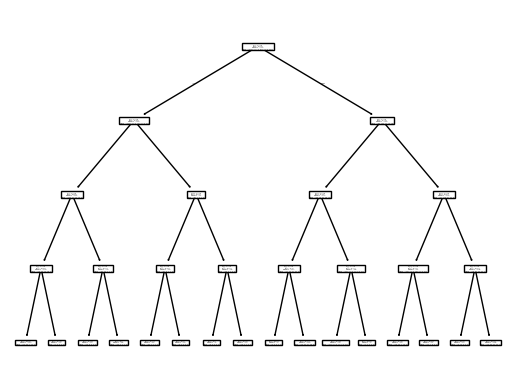

In [ ]:
tree.plot_tree(model)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5, 0.9, 'x[2] <= 0.5\nentropy = 1.938\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.25, 0.7, 'x[3] <= 0.5\nentropy = 1.338\nsamples = 318\nvalue = [224.0, 54.0, 16.0, 20.0, 4.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[1] <= 0.5\nentropy = 1.616\nsamples = 195\nvalue = [119.0, 39.0, 15.0, 18.0, 4.0]'),
 Text(0.0625, 0.3, 'x[6] <= 0.5\nentropy = 0.678\nsamples = 46\nvalue = [40, 4, 2, 0, 0]'),
 Text(0.03125, 0.1, 'entropy = 0.851\nsamples = 33\nvalue = [27, 4, 2, 0, 0]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[8] <= 0.5\nentropy = 1.792\nsamples = 149\nvalue = [79, 35, 13, 18, 4]'),
 Text(0.15625, 0.1, 'entropy = 1.679\nsamples = 123\nvalue = [72, 26, 7, 14, 4]'),
 Text(0.21875, 0.1, 'entropy = 1.943\nsamples = 26\nvalue = [7, 9, 6, 4, 0]'),
 Text(0.375, 0.5, 'x[10] <= 0.5\nentropy = 0.718\nsamples = 123\nvalue = [105, 15, 1, 2, 0]'),
 Text(0.3125, 0.3, 'x[1] <= 0.5\nentropy = 0.41\nsa

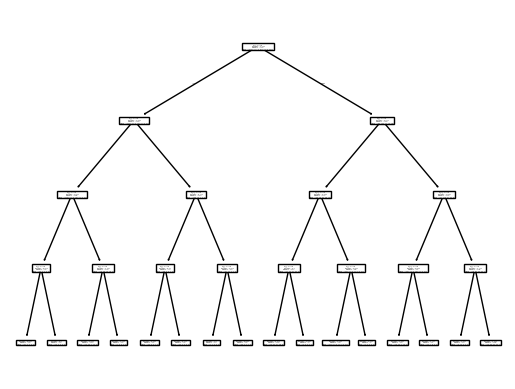

In [ ]:
tree.plot_tree(model)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5604395604395604
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        89
           1       0.39      0.54      0.45        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.21      0.28      0.24       182
weighted avg       0.43      0.56      0.49       182



In [ ]:
interview questions

# **interview question**

In [ ]:
1

ecision trees come with several important hyperparameters that you can tune to balance bias (underfitting) and variance
 1 each can lead to slightly different splits and tree structures
 2 limits the how tree can grow . a deeper tree capture more tree
 3 restricts how many features are considered


# **2**

**label encoding**
1 assign each category a unique integer
2 useful when categories have a meaningful order

**one-hot-encoding**
1 create binary columns
2 prevent ordinary assumptions